In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sentimen = pd.read_csv('data/Text_Preprocessing.csv')
df_sentimen.head()

,Unnamed: 0,no,judul,judul_tokens,judul_tokens_fdist,judul_tokens_WSW,judul_tokens_stemmed
0,0,3,usaha kerajinan gerabah untuk meningkatakan pe...,"['usaha', 'kerajinan', 'gerabah', 'untuk', 'me...",<FreqDist with 19 samples and 19 outcomes>,"['usaha', 'kerajinan', 'gerabah', 'meningkatak...","['usaha', 'rajin', 'gerabah', 'meningkatakan',..."
1,1,3,peranan industri gerabah keramik sebagai suatu...,"['peranan', 'industri', 'gerabah', 'keramik', ...",<FreqDist with 18 samples and 18 outcomes>,"['peranan', 'industri', 'gerabah', 'keramik', ...","['peran', 'industri', 'gerabah', 'keramik', 's..."
2,2,3,industri kerajinan gerabah dan peranannya seba...,"['industri', 'kerajinan', 'gerabah', 'dan', 'p...",<FreqDist with 17 samples and 17 outcomes>,"['industri', 'kerajinan', 'gerabah', 'peranann...","['industri', 'rajin', 'gerabah', 'peran', 'sum..."
3,3,3,peranan industri kecil warangka keris dalam me...,"['peranan', 'industri', 'kecil', 'warangka', '...",<FreqDist with 9 samples and 9 outcomes>,"['peranan', 'industri', 'warangka', 'keris', '...","['peran', 'industri', 'warangka', 'keris', 'ti..."
4,4,3,bimbingan agama islam terhadap remaja dalam ke...,"['bimbingan', 'agama', 'islam', 'terhadap', 'r...",<FreqDist with 14 samples and 14 outcomes>,"['bimbingan', 'agama', 'islam', 'remaja', 'kel...","['bimbing', 'agama', 'islam', 'remaja', 'kelua..."


In [3]:
# no = df_sentimen.groupby("no")
# no.describe()

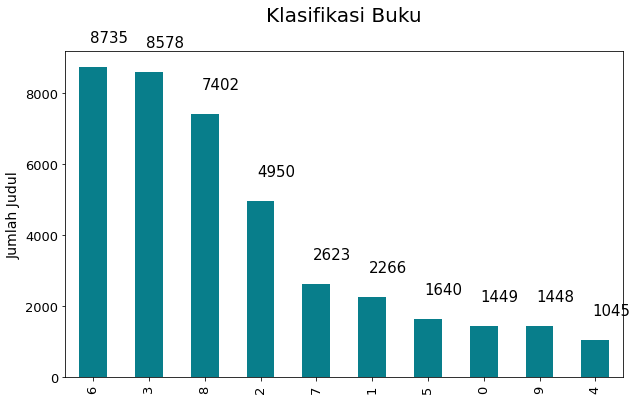

In [4]:
# Memeriksa jumlah judul buku berdasarkan klasifikasi
ax = df_sentimen['no'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Klasifikasi Buku', size=20, pad=30)
ax.set_ylabel('Jumlah Judul', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [5]:
x = df_sentimen['judul_tokens_stemmed']
y = df_sentimen['no']
print('\nJumlah Judul Buku : ')
print(x)
# print('\nJumlah klasifikasi Buku : ')
# print (y.value_counts())


Jumlah Judul Buku : 
0        ['usaha', 'rajin', 'gerabah', 'meningkatakan',...
1        ['peran', 'industri', 'gerabah', 'keramik', 's...
2        ['industri', 'rajin', 'gerabah', 'peran', 'sum...
3        ['peran', 'industri', 'warangka', 'keris', 'ti...
4        ['bimbing', 'agama', 'islam', 'remaja', 'kelua...
                               ...                        
40131                       ['angel', 'in', 'the', 'rain']
40132                           ['the', 'hunger', 'games']
40133                        ['marrying', 'mr', 'perfect']
40134              ['bad', 'boy', 'for', 'little', 'girl']
40135    ['tinjau', 'yuridis', 'laksana', 'program', 'j...
Name: judul_tokens_stemmed, Length: 40136, dtype: object


In [6]:
# Membagi dataset menjadi data training dan data testing
# 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y , random_state = 42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# convert data menjadi tfidf
vectorizer = TfidfVectorizer() 
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [9]:
# Memeriksa vocabulary
vectorizer.vocabulary_

{'bumbu': 2575,
 'inti': 6960,
 'masakan': 10205,
 'usaha': 18334,
 'kreasi': 8890,
 'unik': 18247,
 'hantar': 5981,
 'pengantin': 12692,
 'pitung': 13138,
 'imagined': 6627,
 'comunities': 3203,
 'cerita': 2899,
 'rakyat': 14092,
 'meksiko': 10409,
 'budidaya': 2514,
 'pepaya': 12788,
 'koleksi': 8618,
 'khutbah': 8428,
 'jumat': 7514,
 'ied': 6545,
 'manajemen': 10015,
 'bisnis': 2197,
 'natal': 11370,
 'hutan': 6465,
 'ajar': 320,
 'gambar': 5312,
 'abjad': 43,
 'batu': 1685,
 'desain': 3742,
 'pintu': 13109,
 'garasi': 5355,
 'minimal': 10758,
 'hubung': 6406,
 'stigma': 16398,
 'kualitas': 8965,
 'hidup': 6205,
 'pasien': 12413,
 'skizofrenia': 15978,
 'puskesmas': 13891,
 'srandakan': 16309,
 'bantul': 1570,
 'ekologi': 4380,
 'hewan': 6176,
 'tanah': 16977,
 'putri': 13917,
 'purbasari': 13866,
 'kmunikasi': 8564,
 'interpersonal': 6949,
 'konsep': 8727,
 'newton': 11478,
 'gavitasi': 5389,
 'kembang': 8163,
 'lembar': 9400,
 'kerja': 8292,
 'siswa': 15929,
 'mata': 10255,
 'mat

In [10]:
# Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(
    x_train, # data training 80%
    y_train
)

y_pred = model.predict(
    x_test # data uji 20%
)
print(y_pred)

[6 6 3 ... 8 3 8]



================= confusion matrix ===================== 


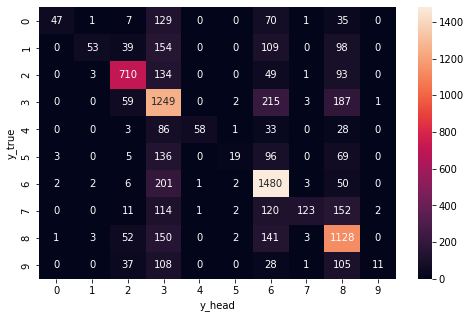


accuracy score hasil prediksi adalah: 
60.76233183856502
precision score hasil prediksi adalah: 
60.76233183856502
recall score hasil prediksi adalah: 
60.76233183856502

accuracy nb adalah:  0.6076233183856502
              precision    recall  f1-score   support

           0       0.89      0.16      0.27       290
           1       0.85      0.12      0.21       453
           2       0.76      0.72      0.74       990
           3       0.51      0.73      0.60      1716
           4       0.97      0.28      0.43       209
           5       0.68      0.06      0.11       328
           6       0.63      0.85      0.72      1747
           7       0.91      0.23      0.37       525
           8       0.58      0.76      0.66      1480
           9       0.79      0.04      0.07       290

    accuracy                           0.61      8028
   macro avg       0.76      0.39      0.42      8028
weighted avg       0.67      0.61      0.56      8028




In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
print("\n================= confusion matrix ===================== ")
# print(cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print("\n=========================================== ")
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred) * 100)

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, y_pred, average='micro') * 100)

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, y_pred, average='micro') * 100)

print("\n============================================================================= ")
print("accuracy nb adalah: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\n============================================================================= ")

In [12]:
# pd.crosstab(y_test, y_pred)

#tes uji data baru
judul = ["matematika dasar fisika biollogi"]
judul_asli = judul
judul2 = ["ekonomi indonesia sedang dalam tumbuh yang bangga"]
judul_asli2 = judul2
#merubah ke bentuk number agar bisa di baca algoritma atau ML
judul = vectorizer.transform(judul)
judul2 = vectorizer.transform(judul2)


print(judul)

  (0, 10269)	0.5324192337646537
  (0, 5050)	0.6576410534897916
  (0, 3542)	0.5329521594686489


In [13]:
prediksi1 = model.predict(judul)
print(prediksi1)

[3]


In [14]:
if prediksi1 == 0:
    print(judul_asli, "Umum")
if prediksi1 == 1:
    print(judul_asli, "Filsafat dan Psikologi")   
if prediksi1 == 2:
    print(judul_asli, "Agama")
if prediksi1 == 3:
    print(judul_asli, "Sosial")
if prediksi1 == 4:
    print(judul_asli, "Bahasa")
if prediksi1 == 5:
    print(judul_asli, "Sains dan Matematika")
if prediksi1 == 6:
    print(judul_asli, "Teknologi")
if prediksi1 == 7:
    print(judul_asli, "Seni dan Rekreasi")
if prediksi1 == 8:
    print(judul_asli, "Literartur dan Sastra")
if prediksi1 == 9:
    print(judul_asli, "Sejarah dan Geografi")

['matematika dasar fisika biollogi'] Sosial


In [15]:
# pip install imblearn

In [16]:
# Balancing data menggunakan smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [17]:
x_train_smote, y_train_smote = smote.fit_resample(
    x_train.astype('float'), # data training 80%
    y_train
)

In [18]:
from collections import Counter
print("Before SMOTE : \n", Counter(y_train))
print("After  SMOTE : \n", Counter(y_train_smote))

Before SMOTE : 
 Counter({6: 6988, 3: 6862, 8: 5922, 2: 3960, 7: 2098, 1: 1813, 5: 1312, 0: 1159, 9: 1158, 4: 836})
After  SMOTE : 
 Counter({6: 6988, 7: 6988, 8: 6988, 9: 6988, 3: 6988, 2: 6988, 1: 6988, 5: 6988, 0: 6988, 4: 6988})


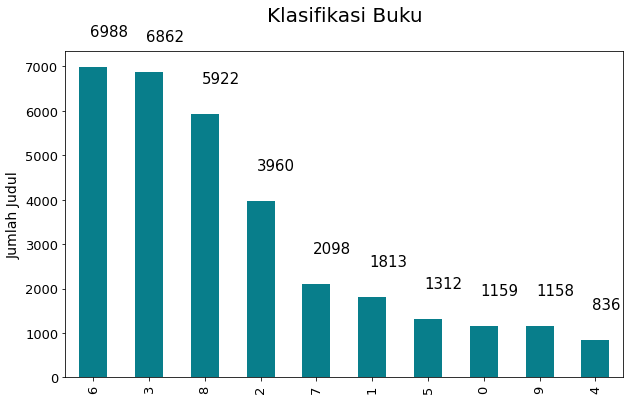

In [19]:
# Memeriksa jumlah judul buku berdasarkan klasifikasi sebelum over sampling
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Klasifikasi Buku', size=20, pad=30)
ax.set_ylabel('Jumlah Judul', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

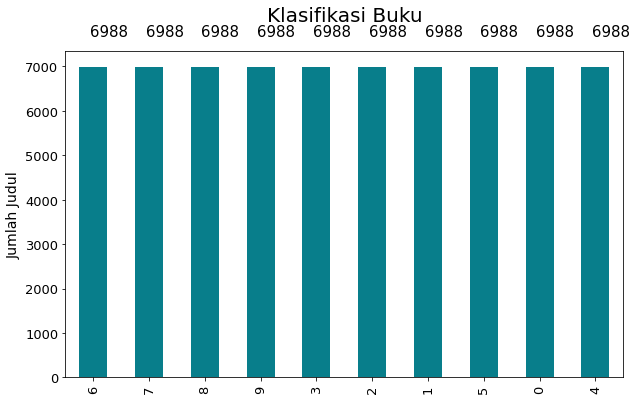

In [20]:
# Memeriksa jumlah judul buku berdasarkan klasifikasi
ax = y_train_smote.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Klasifikasi Buku', size=20, pad=30)
ax.set_ylabel('Jumlah Judul', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [21]:
# Model MultinomialNB Menggunakan data training setelah di over sampling
model_smote = MultinomialNB()
model_smote.fit(
    x_train_smote, # data training 80%
    y_train_smote
)

y_pred_smote = model_smote.predict(
    x_test # data uji 20%
)
print(y_pred_smote)

[7 6 9 ... 8 3 8]



================= confusion matrix ===================== 


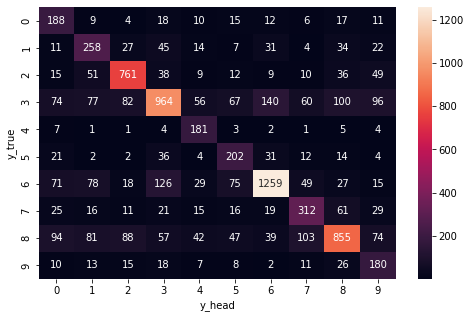


accuracy score hasil prediksi adalah: 
64.27503736920778
precision score hasil prediksi adalah: 
64.27503736920778
recall score hasil prediksi adalah: 
64.27503736920778

accuracy nb adalah:  0.6427503736920778
              precision    recall  f1-score   support

           0       0.36      0.65      0.47       290
           1       0.44      0.57      0.50       453
           2       0.75      0.77      0.76       990
           3       0.73      0.56      0.63      1716
           4       0.49      0.87      0.63       209
           5       0.45      0.62      0.52       328
           6       0.82      0.72      0.77      1747
           7       0.55      0.59      0.57       525
           8       0.73      0.58      0.64      1480
           9       0.37      0.62      0.47       290

    accuracy                           0.64      8028
   macro avg       0.57      0.65      0.59      8028
weighted avg       0.68      0.64      0.65      8028




In [22]:
# cm = confusion_matrix(y_test, y_pred)
print("\n================= confusion matrix ===================== ")
# print(cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()
print("\n=========================================== ")
# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, y_pred_smote) * 100)

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, y_pred_smote, average='micro') * 100)

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, y_pred_smote, average='micro') * 100)

print("\n============================================================================= ")
print("accuracy nb adalah: ", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("\n============================================================================= ")

In [23]:
prediksi2 = model_smote.predict(judul2)
print(prediksi2)
if prediksi2 == 0:
    print(judul_asli2, "Umum")
if prediksi2 == 1:
    print(judul_asli2, "Filsafat dan Psikologi")   
if prediksi2 == 2:
    print(judul_asli2, "Agama")
if prediksi2 == 3:
    print(judul_asli2, "Sosial")
if prediksi2 == 4:
    print(judul_asli2, "Bahasa")
if prediksi2 == 5:
    print(judul_asli2, "Sains dan Matematika")
if prediksi2 == 6:
    print(judul_asli2, "Teknologi")
if prediksi2 == 7:
    print(judul_asli2, "Seni dan Rekreasi")
if prediksi2 == 8:
    print(judul_asli2, "Literartur dan Sastra")
if prediksi2 == 9:
    print(judul_asli2, "Sejarah dan Geografi")

[3]
['ekonomi indonesia sedang dalam tumbuh yang bangga'] Sosial


In [24]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def cek_wordcloud_by_class_function(x):
    text = df_sentimen.loc[df_sentimen.no == x]
    text = " ".join(review for review in map(str,text.judul_tokens_stemmed))
    print ("Kode Kelas {}".format(str(x)))
    print ("There are {} words in the combination of all review.".format(len(text)))

    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    # stopwords.update(["',", "now", "wine", "flavor", "flavors"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Kode Kelas 0
There are 71447 words in the combination of all review.


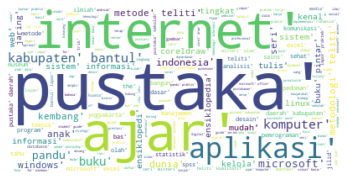

Kode Kelas 1
There are 112821 words in the combination of all review.


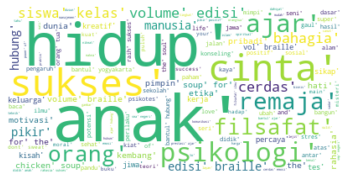

Kode Kelas 2
There are 203326 words in the combination of all review.


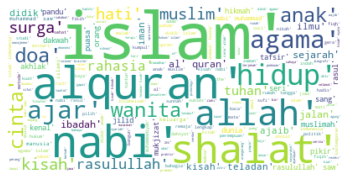

Kode Kelas 3
There are 616900 words in the combination of all review.


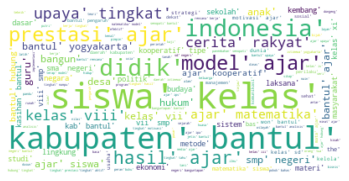

Kode Kelas 4
There are 54677 words in the combination of all review.


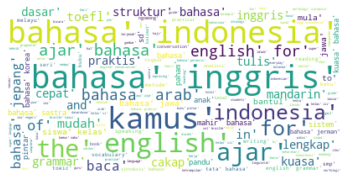

Kode Kelas 5
There are 79631 words in the combination of all review.


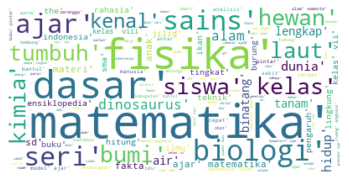

Kode Kelas 6
There are 593971 words in the combination of all review.


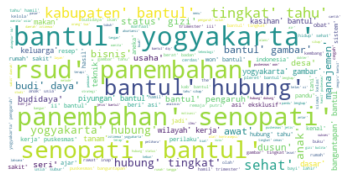

Kode Kelas 7
There are 100931 words in the combination of all review.


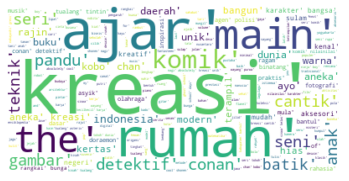

Kode Kelas 8
There are 250075 words in the combination of all review.


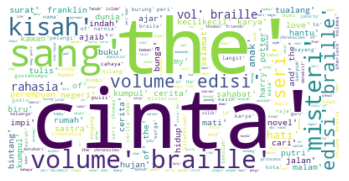

Kode Kelas 9
There are 67581 words in the combination of all review.


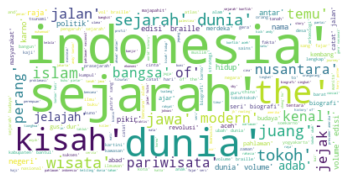

In [26]:
cek_wordcloud_by_class_function(0)
cek_wordcloud_by_class_function(1)
cek_wordcloud_by_class_function(2)
cek_wordcloud_by_class_function(3)
cek_wordcloud_by_class_function(4)
cek_wordcloud_by_class_function(5)
cek_wordcloud_by_class_function(6)
cek_wordcloud_by_class_function(7)
cek_wordcloud_by_class_function(8)
cek_wordcloud_by_class_function(9)